In [51]:
"""
Import necessary libraries for data analysis and visualization.

import of pandas (as pd) which is a powerful data manipulation and analysis library.
import of matplotlib.pyplot (as plt), a plotting library for creating static, animated, and interactive visualizations.
import of numpy (as np)for library for numerical operations on arrays and matrices.
import of seaborn (as sns)requires for the statistical data visualization library based on Matplotlib, providing a high-level
                                                       interface for drawing attractive and informative statistical graphics.

"""

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [52]:


def selected_values (filename,indicator_name):
    """
    Extracts selected data from a given CSV file based on the indicator name and specific countries.

    Parameters used in the function named selected_values;
    * filename (str): The path to the CSV file containing the dataset.
    * indicator_name (str), The name of the indicator to filter the data (ex. 'Annual freshwater withdrawals, total (billion cubic meters)'.

    The function returns,
    + selected_data (pd.DataFrame): DataFrame containing the selected data for the specified indicator and countries.
    + transposed_data (pd.DataFrame): Transposed DataFrame with columns named after countries, indexed by years.

    """
    dataset_world = pd.read_csv(filename,skiprows=3)# Read the dataset, skipping the first three rows
    # Defining the list of countries
    country = ['Africa Eastern and Southern','Africa Western and Central','Arab World','United Arab Emirates', 'Argentina']
    # Filter data based on indicator name and selected countries
    choosed_data = dataset_world[(dataset_world['Indicator Name'] == indicator_name) & (dataset_world['Country Name'].isin(country))]
    # Drop the unnecessary column
    selected_data = choosed_data.drop(['Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1962', '1963', '1964', '1965', '1966',
                                       '1967','1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
                                       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '2016', '2017', '2018', '2019',
                                       '2020','2021', '2022','Unnamed: 67'],axis = 1).reset_index(drop = True)
    #Transpose the data
    transd_data = selected_data.transpose()
    transd_data.columns = transd_data.iloc[0]
    transd_data = transd_data.iloc[1:]
    # Convert the index to numeric, replacing non-numeric values with NaN
    transd_data.index = pd.to_numeric(transd_data.index, errors='coerce')
    # Add a 'Years' column based on the DataFrame index
    transd_data['Years'] = transd_data.index
    return selected_data, transd_data

In [53]:


def  sli_of_data(df):
    """
    Selects specific columns from a DataFrame.

   The parameter id the a dataframe, df (pd.DataFrame) which is the input DataFrame.

    and returns the selected_data (pd.DataFrame): A new DataFrame containing only the 'Country Name' and the year '2013' columns.
    
    """
    df = df[['Country Name', '2013']]
    return df


# Perform outer joins on 'Country Name' for all five DataFrames
def merge_five_data(a1,a2,a3,a4,a5):
    """
    Merges five DataFrames on the 'Country Name' column using outer joins.
    Five data frames are merged here with parameter a1, a2, a3, a4, a5
    Returns a 'merged_data', a new DataFrame resulting from the outer merge of the input DataFrames.
    
    """
    merge1 = pd.merge(a1,a2, on= 'Country Name', how = 'outer')
    merge2 = pd.merge(merge1, a3, on= 'Country Name', how = 'outer')
    merge3 = pd.merge(merge2, a4, on= 'Country Name', how = 'outer')
    merge4 = pd.merge(merge3, a5, on= 'Country Name', how = 'outer')
    # Reset the index and drop the original index column
    merge4 = merge4.reset_index(drop = True)
    return merge4

def two_data_merge(x, y):
        
    """
    Merges two DataFrames based on the 'Years' column using an outer join and filters specific years.

    Parameters:
    - dataframe_x (pd.DataFrame): The first DataFrame to be merged.
    - dataframe_y (pd.DataFrame): The second DataFrame to be merged.

    Returns:
    - merged_and_filtered_data (pd.DataFrame): A new DataFrame resulting from the merge of the input DataFrames,
                                               with only the rows corresponding to the years [1995, 2000, 2005, 2010, 2015].
    """    
    
    # Merge DataFrames x and y on the 'Years' column using an outer join
    x_y = pd.merge(x, y, on='Years', how='outer')
    #Reseting the index and drop the original index column
    x_y = x_y.reset_index(drop=True)
    # Filter the merged DataFrame to include only specific years [1995, 2000, 2005, 2010, 2015]
    x_y_years = x_y[x_y['Years'].isin([1995, 2000, 2005, 2010, 2015])]
    return x_y_years

In [54]:
# Calling the selected_values and the transd_data function for Electric power consumption
ele_con,no2_ele_con_tran  = selected_values('API_19_DS2_en_csv_v2_5998250.csv','Electric power consumption (kWh per capita)')
# Calling the selected_values and the transd_data function for Renewable energy consumption
re_ene_con,re_ene_con_tran = selected_values('API_19_DS2_en_csv_v2_5998250.csv', 'Renewable energy consumption (% of total final energy consumption)')
# Calling the selected_values and the transd_data function for Electricity production from renewable sources, excluding hydroelectric
ele_prd_rnsc,ele_prd_rnsc_tran = selected_values('API_19_DS2_en_csv_v2_5998250.csv','Electricity production from renewable sources, excluding hydroelectric (% of total)')
# Calling the selected_values and the transd_data function for Electricity production from natural gas sources
ele_prd_ngas,ele_prd_ngas_tran = selected_values('API_19_DS2_en_csv_v2_5998250.csv', 'Electricity production from natural gas sources (% of total)')
# Calling the selected_values and the transd_data function for Renewable electricity output 
re_ele_outpt,re_ele_outpt_tran = selected_values('API_19_DS2_en_csv_v2_5998250.csv','Renewable electricity output (% of total electricity output)')


In [55]:
# Slice the data for the year 2013 and rename columns
ele_con_cor = sli_of_data(ele_con).rename(columns={'2013': 'Electric power consumption'})
re_ene_con_cor = sli_of_data(re_ene_con).rename(columns={'2013': 'Renewable energy consumption'})
ele_prd_rnsc_cor = sli_of_data(ele_prd_rnsc).rename(columns={'2013': 'Electricity production(non-hydro renewable sources)'})
ele_prd_ngas_cor = sli_of_data(ele_prd_ngas).rename(columns={'2013': 'Electricity production(natural gas sources)'})
re_ele_outpt_cor = sli_of_data(re_ele_outpt).rename(columns={'2013': 'Renewable electricity output'})


In [56]:
#Merge the DataFrames by using the defined function 'merge_five_data'
data1234 = merge_five_data(ele_con_cor, re_ene_con_cor, ele_prd_rnsc_cor, ele_prd_ngas_cor, re_ele_outpt_cor)

# Provide descriptive statistics
data1234.describe()



,Electric power consumption,Renewable energy consumption,Electricity production(non-hydro renewable sources),Electricity production(natural gas sources),Renewable electricity output
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3495.660301,30.342929,0.770401,51.266918,18.649097
std,4496.382942,35.977056,0.819268,35.178003,15.967328
min,178.422404,0.100000,0.094142,0.862890,0.094142
25%,691.958090,4.484018,0.317509,46.825454,3.770385
50%,2369.437907,8.910000,0.354142,47.235364,22.732604
75%,2967.376558,61.082685,0.970850,62.814548,31.484491
max,11271.106545,77.137941,2.115360,98.596336,35.163864


In [64]:
# Define different type of Plot function 


def plot_heatmap(df):
    """
    Plot a heatmap of the correlation matrix between the indicators in the DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame containing numeric indicators.

    Returns:
    - None: Displays the heatmap.


    """
    numeric_df = df.select_dtypes(include=[np.number])
    plt.figure(figsize=(5,4)) #Set the figure size
    sns.heatmap(numeric_df.corr(), cmap='plasma', square=True, linewidths=.5, annot=True, fmt=".2f", center=0,vmin=-1, vmax=1)
    plt.title('Correlation of Indicators (2013)') #Set the title 
    plt.show() #Display the plot

    

def bar_plot(df,x_value, y_value, head_title, x_label, y_label, colors,figsize=(10,6)):
    """
    Generate a bar plot from a DataFrame.
    
    Parameters:
    - df (DataFrame): The pandas DataFrame containing the data.
    - x_value (str): The column name or index for the x-axis values.
    - y_value (str): The column name or index for the y-axis values.
    - head_title (str): The title of the bar plot.
    - x_label (str): Label for the x-axis.
    - y_label (str): Label for the y-axis.
    - colors (list): List of colors for the bars.
    - figsize (tuple, optional): The size of the figure (width, height). Default is (10, 6).

    Returns:
    - None: Displays the bar plot.

    """

    sns.set_style('whitegrid') #setting whitegrid
    # Assuming df, x_value, y_value, title, xlabel, ylabel, and colors are defined for the pie plot
    df.plot(x = x_value, y =  y_value,kind = 'bar', title =head_title, color = colors,width=0.65,figsize=figsize,xlabel=x_label,ylabel=y_label)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 0.4))#Specifies the location and defines the bounding box for the legend
    plt.show()#Display the plot



def pie_plot(df, Years,title, autopct, fontsize):
    
    """
    Generate a pie chart from a DataFrame to visualize electricity consumption of different years.

    Parameters:
     df (DataFrame): The pandas DataFrame containing the data.
    - Years (str): The column name representing the years for which to generate the pie chart.
    - title(str): The title of the graph
    - autopct (str or callable): The format string or function used to label the wedges with their numeric value.
    - fontsize (int): The font size for the title of the pie chart.
    
    """
    plt.figure(figsize=(4, 5)) # Set the figure size
    Years = str(Years) #Change the data type
    #Label the pie chart with the countries
    label=['Africa Eastern and Southern','Africa Western and Central','Arab World','United Arab Emirates', 'Argentina']
    # Omit the 'explode' parameter or provide a list of the same length as the data
    plt.pie(df[Years], autopct=autopct, labels=label,
            startangle=180, wedgeprops={"edgecolor": "gray", "linewidth": 1, "antialiased": True},)

    plt.title(title, fontsize=fontsize)# Setting the title and font size
    plt.show()#Display the plot 

    

def lineplot(df, y_label, title_of_graph):
        
    """
    Generate a line plot from a DataFrame to visualize trends over of a certain period by definig a fuction
    with DataFrame y label and title .
    
    Parameters are
    > df (DataFrame): The pandas DataFrame containing the data.
    > y_label (str): The label for the y-axis.
    > title_of_graph (str): The title of the line plot.

    Returns:
    - None: Displays the line plot.

    """
    sns.set_style("whitegrid")
    df.plot(x = 'Years', y = ['Africa Eastern and Southern','Africa Western and Central','Arab World','United Arab Emirates', 'Argentina'],xlabel='Years',ylabel=y_label, marker = '.')
    plt.title(title_of_graph)
    plt.xticks(range(1995, 2016, 2))# Sets the x-axis tick positions at intervals of 2 years from 1995 to 2015.
    plt.legend(loc='best', bbox_to_anchor=(1, 0.4))
    plt.show()

    

def skew(df):
    """
    Calculate the skewness (measure of the asymmetry of a probability distribution) of numerical columns in a DataFrame.
    
    df (DataFrame) is the parameter which is the the pandas DataFrame containing numerical data.
    and returns df,A pandas Series containing the skewness values for each numerical column.
    
    """
    df = df.skew()
    return df


def kurt(df):
    """
    Calculate the kurtosis(measure that describes the shape of the
    probability distribution of a real-valued random variable) of numerical columns in a DataFrame.
    Parameters:
    * df (DataFrame): The pandas DataFrame containing numerical data.

    Returns:
    * Series: A pandas Series containing the kurtosis values for each numerical column.

    
    """
    df=df.kurt()
    return df

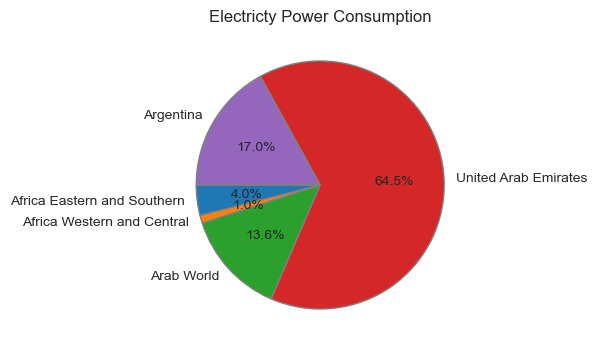

In [65]:
# Call the function without specifying 'explode' of the year 2013
pie_plot(ele_con, 2013, 'Electricty Power Consumption', autopct='%1.1f%%', fontsize=12)

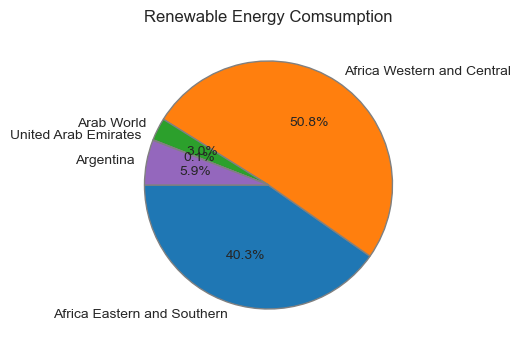

In [66]:
# Call the function without specifying 'explode' of the year 1999

pie_plot(re_ene_con, 2013, 'Renewable Energy Comsumption', autopct='%1.1f%%', fontsize=12)


In [46]:
""" 
    Merge two data Electricity production from renewable sources,excluding hydroelectric source)
    and Electricity production from natural gas sources
    
    """
ele_prd_rnsc_ele_prd_ngas = two_data_merge(ele_prd_rnsc_tran,ele_prd_ngas_tran)

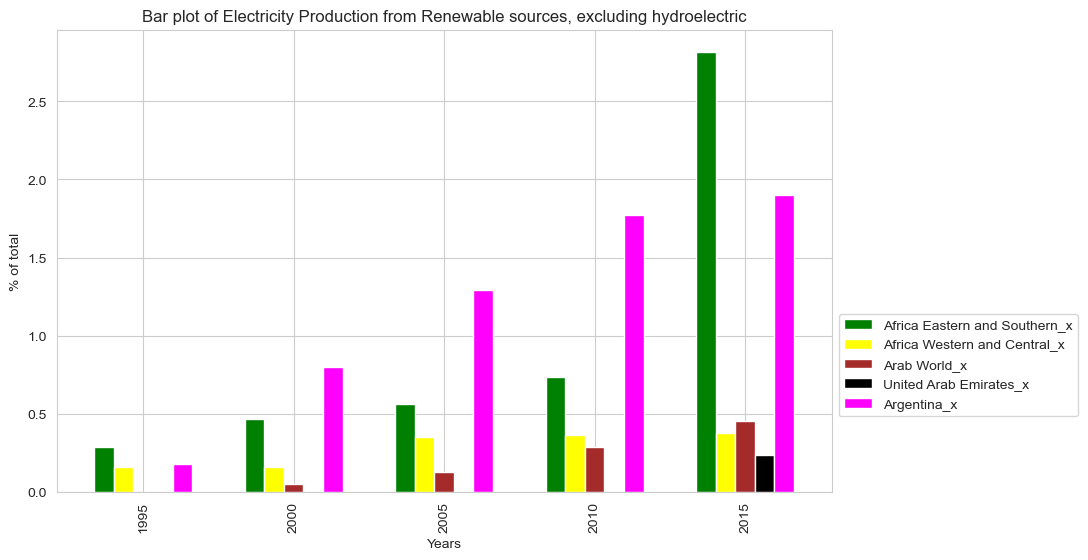

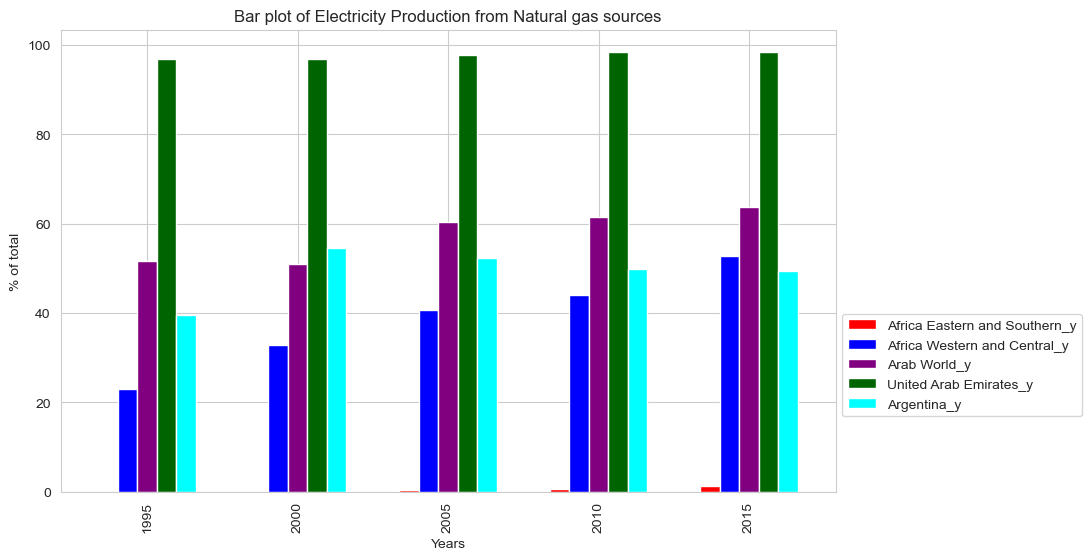

In [47]:
#Calling the function to plot the bar plot of Electricity production from renewable sources, excluding hydroelectric and Electricity production from natural gas sources

bar_plot(ele_prd_rnsc_ele_prd_ngas, 'Years', ['Africa Eastern and Southern_x', 'Africa Western and Central_x', 'Arab World_x', 'United Arab Emirates_x', 'Argentina_x'], 'Bar plot of Electricity Production from Renewable sources, excluding hydroelectric','Years', '% of total', ('green', 'yellow','brown','black','magenta'))
bar_plot(ele_prd_rnsc_ele_prd_ngas, 'Years', ['Africa Eastern and Southern_y', 'Africa Western and Central_y', 'Arab World_y', 'United Arab Emirates_y', 'Argentina_y'], 'Bar plot of Electricity Production from Natural gas sources','Years', '% of total', ('red', 'blue','purple','darkgreen','cyan','gray'))

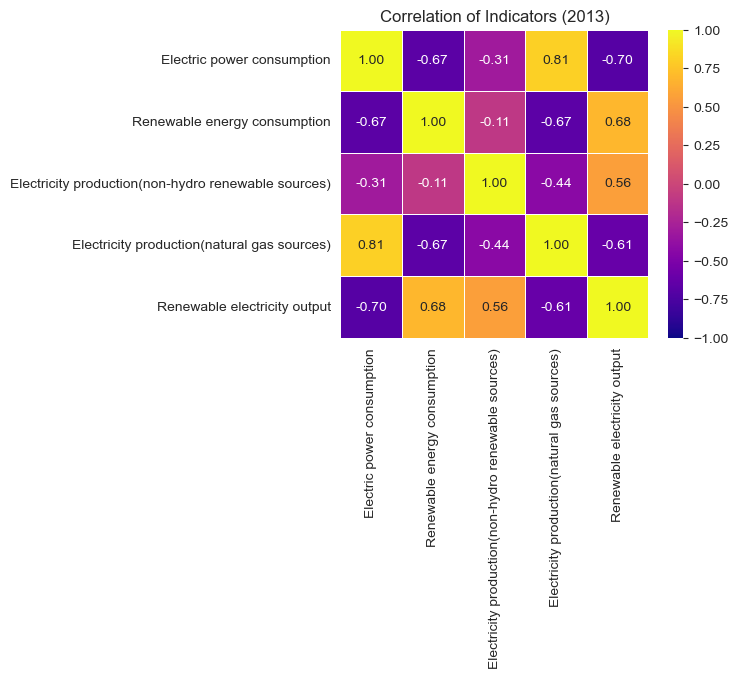

In [32]:
#Calling the function to show the corelation between the indicators

plot_heatmap(data1234)

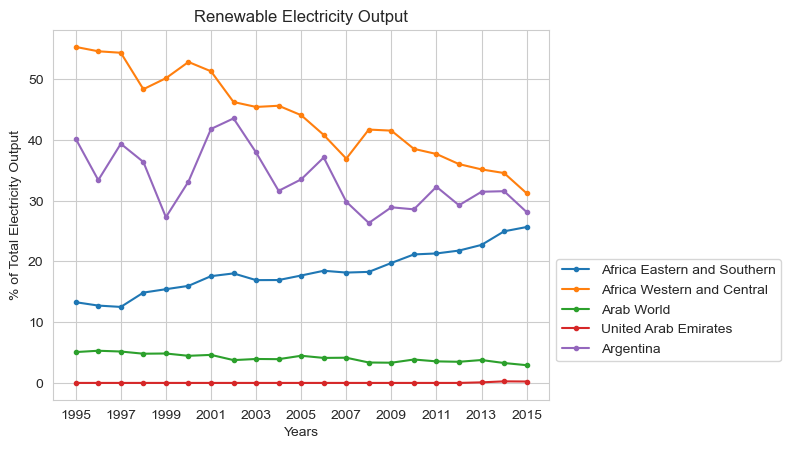

In [26]:
#Calling the line plot function to shoe the Renewable electricty ouput data of selected countries

lineplot(re_ele_outpt_tran, '% of Total Electricity Output', 'Renewable Electricity Output')

In [76]:
re_eng_otpt_skew = skew(re_ele_outpt_tran )

re_eng_otpt_kurt = kurt(re_ele_outpt_tran )

In [77]:
re_eng_otpt_skew

Country Name
Africa Eastern and Southern     0.34151
Africa Western and Central     0.061326
Arab World                     0.211292
United Arab Emirates           2.682753
Argentina                      0.554993
Years                               0.0
dtype: object

In [49]:
re_eng_otpt_kurt

Country Name
Africa Eastern and Southern    -0.32537
Africa Western and Central     -1.16685
Arab World                    -0.973491
United Arab Emirates           6.174718
Argentina                     -0.713077
Years                              -1.2
dtype: object